In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

In [ ]:
conn = sqlite3.connect(r'C:\Users\j1wag\Desktop\Masters Year 1\Semester 1\CME538\Final Assignment\Github\BreakinBadCode\Wine_Raw_Data\red_wines_final.db')
c = conn.cursor()
wine_df = pd.read_sql_query("SELECT * FROM red_wines", conn)
wine_df = wine_df.dropna()

Clean up the dataframe; remove irrelevant columns

In [ ]:
wine_df = wine_df.drop(columns = ['id','url_idx'])

Remove outliers

In [ ]:
# Get total bottle counts by country
total_bottles = wine_df['Country'].value_counts()

# Calculate the 75th percentile threshold
percentile_threshold = total_bottles.quantile(0.75)

# Filter out countries with bottle counts more than the 75th percentile
top_countries = total_bottles[total_bottles > percentile_threshold]

# add the top countries to a list
countries = top_countries.index.tolist()
top_countries

Country
United States    6705
Italy            6172
France           4929
Spain            1088
Australia         796
Canada            759
Argentina         559
Chile             310
Portugal          238
Name: count, dtype: int64

In [ ]:
filtered_wine_df = wine_df[wine_df['Country'].isin(countries)]
filtered_wine_df['Country'].unique()

array(['Italy', 'France', 'United States', 'Australia', 'Spain', 'Chile',
       'Portugal', 'Argentina', 'Canada'], dtype=object)

In [ ]:
# Remove outliers based on Ratings

# create a copy of the original dataframe
filtered_wine_df = filtered_wine_df.copy()

# calculate the mean and standard deviation
mean_rating = wine_df['Rating'].mean()
std_rating = wine_df['Rating'].std()

# Define low ratings as those more than 1 standard deviation below the mean
low_rating_threshold = mean_rating - std_rating

filtered_wine_df = filtered_wine_df[filtered_wine_df['Rating'] > low_rating_threshold].sort_values(by = 'Rating', ascending = False)
filtered_wine_df

,Producer,WineType,Year,Region,Country,URL,Rating,Num_Ratings,Price
80,Schrader,Cabernet Sauvignon Old Sparky Beckstoffer To K...,2015.0,Napa Valley,United States,https://www.vivino.com/schrader-cellars-cabern...,4.9,37,3499.99
79,Château Pétrus,Pomerol,1960.0,Pomerol,France,https://www.vivino.com/chateau-petrus-pomerol/...,4.9,64,6264.57
78,Hundred Acre,Kayli Morgan Vineyard Cabernet Sauvignon,2017.0,Napa Valley,United States,https://www.vivino.com/hundred-acre-kayli-morg...,4.9,86,979.99
101,Schrader,Cabernet Sauvignon RBS Beckstoffer To Kalon Vi...,2009.0,Oakville,United States,https://www.vivino.com/schrader-cellars-cabern...,4.8,208,644.07
88,Château Pétrus,Pomerol,1990.0,Pomerol,France,https://www.vivino.com/chateau-petrus-pomerol/...,4.8,1245,6923.00
...,...,...,...,...,...,...,...,...,...
15853,Tenuta Perano,Chianti Classico,2018.0,Chianti Classico,Italy,https://www.vivino.com/tenuta-perano-chianti-c...,3.9,1101,35.90
15854,Louis M. Martini,Sonoma County Cabernet Sauvignon,2020.0,Sonoma County,United States,https://www.vivino.com/louis-m-martini-sonoma-...,3.9,1100,36.99
15855,Michael David Winery,Freakshow Zinfandel,2019.0,Lodi,United States,https://www.vivino.com/michael-david-winery-fr...,3.9,1042,38.99
15856,Mer Soleil,Reserve Pinot Noir,2019.0,Santa Lucia Highlands,United States,https://www.vivino.com/mer-soleil-reserve-pino...,3.9,828,37.99


In [67]:
# Remove outliers based on number of ratings

# Calculate the 25th percentile threshold
low_ratings_threshold = filtered_wine_df['Num_Ratings'].quantile(0.25)

# Filter out wines with number of ratings greater than the 25th percentile
filtered_wine_df = filtered_wine_df[filtered_wine_df['Num_Ratings']>= low_ratings_threshold]

filtered_wine_df

,Producer,WineType,Year,Region,Country,URL,Rating,Num_Ratings,Price
101,Schrader,Cabernet Sauvignon RBS Beckstoffer To Kalon Vi...,2009.0,Oakville,United States,https://www.vivino.com/schrader-cellars-cabern...,4.8,208,644.07
88,Château Pétrus,Pomerol,1990.0,Pomerol,France,https://www.vivino.com/chateau-petrus-pomerol/...,4.8,1245,6923.00
85,Château Latour,Grand Vin Pauillac (Premier Grand Cru Classé),1982.0,Pauillac,France,https://www.vivino.com/fr-chateau-latour-grand...,4.8,1445,2784.25
86,Château Haut-Brion,Pessac-Léognan (Premier Grand Cru Classé),1990.0,Pessac-Léognan,France,https://www.vivino.com/haut-brion-pessac-leogn...,4.8,1412,1736.00
87,Vega Sicilia,Unico (Gran Reserva),1998.0,Ribera del Duero,Spain,https://www.vivino.com/vega-sicilia-unico-gran...,4.8,1320,950.00
...,...,...,...,...,...,...,...,...,...
15852,Michael David Winery,Freakshow Cabernet Sauvignon,2021.0,Lodi,United States,https://www.vivino.com/michael-david-winery-fr...,3.9,1218,37.99
15853,Tenuta Perano,Chianti Classico,2018.0,Chianti Classico,Italy,https://www.vivino.com/tenuta-perano-chianti-c...,3.9,1101,35.90
15854,Louis M. Martini,Sonoma County Cabernet Sauvignon,2020.0,Sonoma County,United States,https://www.vivino.com/louis-m-martini-sonoma-...,3.9,1100,36.99
15855,Michael David Winery,Freakshow Zinfandel,2019.0,Lodi,United States,https://www.vivino.com/michael-david-winery-fr...,3.9,1042,38.99


In [68]:
# Create a copy to avoid SettingWithCopyWarning
filtered_wine_df = filtered_wine_df.copy()

#calculate min and max ratings
min_rating = low_rating_threshold
# filtered_wine_df['Rating'].min()
max_rating = filtered_wine_df['Rating'].max()

# Create a column for normalized ratings and calculate the rating-to-price ratio
filtered_wine_df['Normalized_Rating'] = (filtered_wine_df['Rating'] - min_rating) / (max_rating - min_rating)
filtered_wine_df['ratings_to_price_ratio'] = filtered_wine_df['Normalized_Rating'] / filtered_wine_df['Price']

# Sort by 'ratings_to_price__ratio' and get the top 10
filtered_wine_df = filtered_wine_df.sort_values(by = 'ratings_to_price_ratio', ascending = False)

filtered_wine_df = filtered_wine_df.reset_index(drop = True)

filtered_wine_df

,Producer,WineType,Year,Region,Country,URL,Rating,Num_Ratings,Price,Normalized_Rating,ratings_to_price_ratio
0,Lavradores de Feitoria,Douro Tinto,2021.0,Douro,Portugal,https://www.vivino.com/lavradores-de-feitoria-...,4.2,295,15.75,0.387939,0.024631
1,Cassini,Godfather Red,2021.0,Okanagan Valley,Canada,https://www.vivino.com/cassini-okanagan-valley...,4.4,160,26.59,0.591959,0.022262
2,Alma Negra,M Blend,2017.0,Mendoza,Argentina,https://www.vivino.com/alma-negra-m-blend/w/11...,4.4,4746,28.39,0.591959,0.020851
3,Road 31 Wine Co.,Pinot Noir,2023.0,Napa Valley,United States,https://www.vivino.com/road-31-wine-co-pinot-n...,4.4,569,29.80,0.591959,0.019864
4,Vinum Cellars,The Insider Cabernet Sauvignon,2019.0,Paso Robles,United States,https://www.vivino.com/us-vinum-cellars-us-the...,4.3,188,25.19,0.489949,0.019450
...,...,...,...,...,...,...,...,...,...,...,...
13116,Château Pétrus,Pomerol,2000.0,Pomerol,France,https://www.vivino.com/chateau-petrus-pomerol/...,4.7,808,12999.99,0.897990,0.000069
13117,Le Pin,Pomerol,1995.0,Pomerol,France,https://www.vivino.com/le-pin-pomerol/w/119749...,4.7,119,15869.00,0.897990,0.000057
13118,Domaine Arnoux-Lachaux,Vosne-Romanée 1er Cru 'Aux Reignots',2019.0,Vosne-Romanée 1er Cru 'Aux Raignots',France,https://www.vivino.com/domaine-arnoux-lachaux-...,4.3,137,9595.00,0.489949,0.000051
13119,Domaine de La Romanée-Conti,Romanée-Conti Grand Cru,2010.0,Romanée-Conti Grand Cru,France,https://www.vivino.com/domaine-de-la-romanee-c...,4.7,290,32000.00,0.897990,0.000028


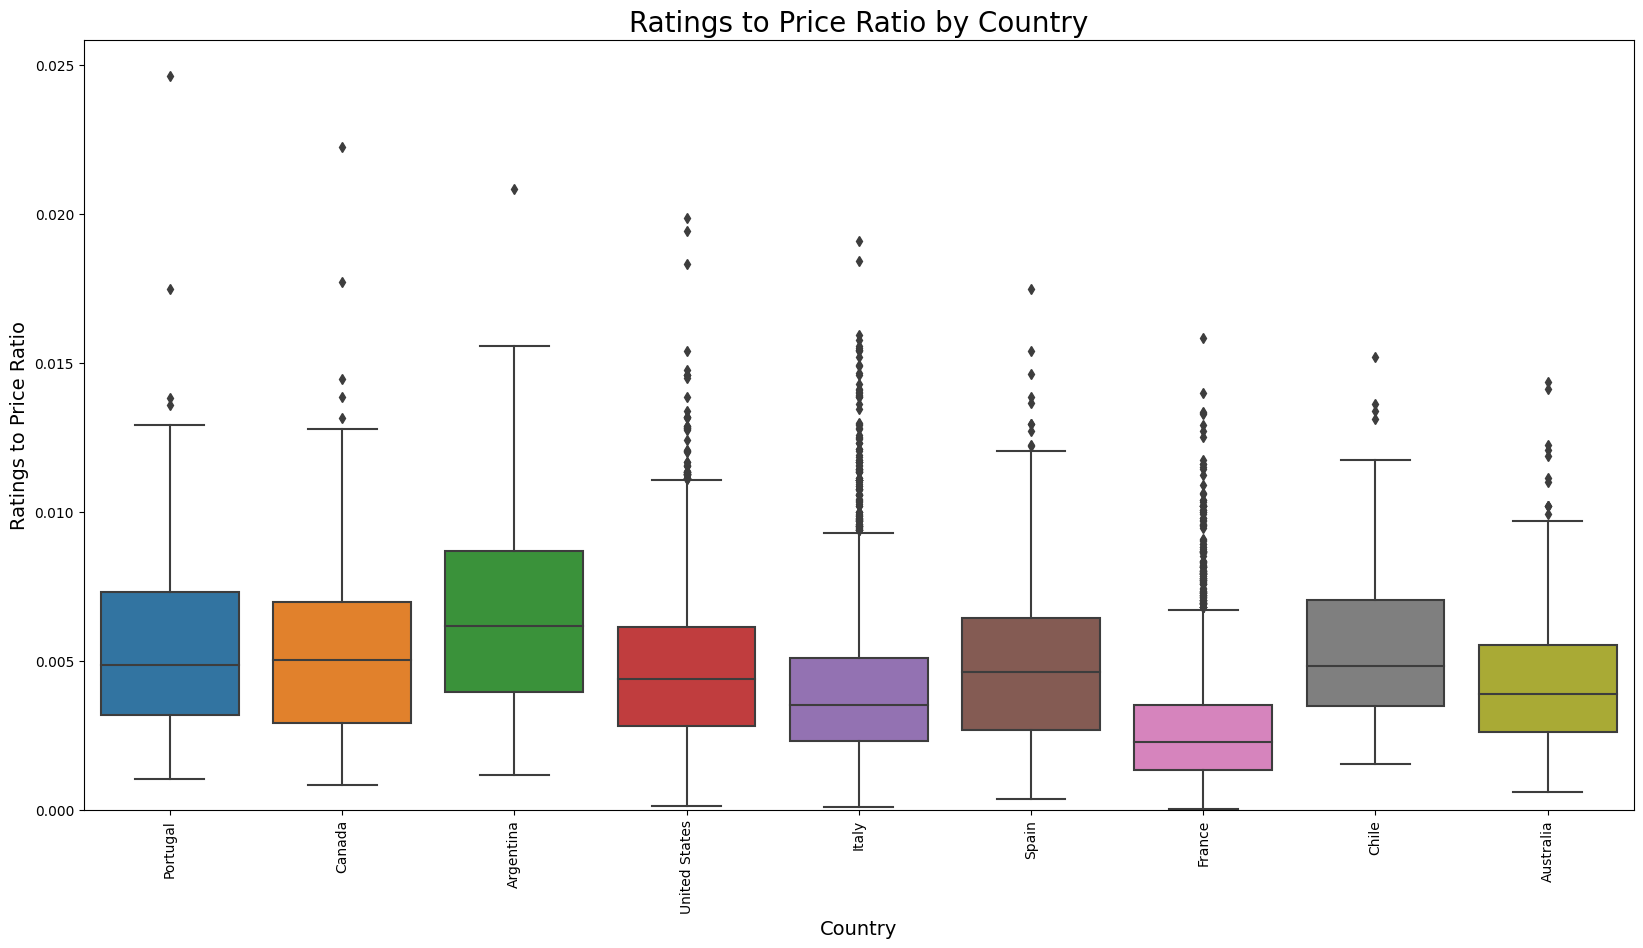

In [114]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Country', y='ratings_to_price_ratio', data=filtered_wine_df)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Ratings to Price Ratio", fontsize = 14)
plt.title("Ratings to Price Ratio by Country", fontsize = 20)
plt.xticks(rotation=90)
plt.ylim(bottom=0)

plt.show()

# NEW CODE HERE

In [55]:
wine_df = pd.read_csv('Final_DataFrames\FINAL_training_data_Model2_FINAL.csv')

In [3]:
wine_df.head()

,Producer,WineType,District,Year,Ratings_Average,Price,Acidity,Intensity,Sweetness,Tannin,...,December Cumulative Rain (mm),December Cumulative Snow (mm),December Cumulative Precip (mm),December Avg Cloud Cover (%),December Max Wind Speed (Km/h),December Min Wind Speed (Km/h),December Avg Wind Speed (Km/h),December Avg Daylight Hours,December Days Below 0 (°C),December Days Above 32 (°C)
0,trinite estate,acaibo,Sonoma,2018,4.1,100.8,4.0,5.0,1.0,4.5,...,75.900000,0.00,75.900000,60.690860,25.346148,0.36,6.735369,9.532272,0.0,0.0
1,trinite estate,acaibo,Sonoma,2016,4.1,100.8,4.0,5.0,1.0,4.5,...,118.899999,0.00,118.899999,54.302419,19.645580,0.00,6.646974,9.530239,0.0,0.0
2,trinite estate,acaibo,Sonoma,2015,4.1,100.8,4.0,5.0,1.0,4.5,...,145.100001,0.00,145.100001,62.354838,26.302181,0.36,7.692760,9.533807,0.0,0.0
3,trinite estate,acaibo,Sonoma,2014,4.2,100.8,4.0,5.0,1.0,4.5,...,280.000000,0.00,280.000000,73.610215,34.093730,0.36,7.827738,9.532552,0.0,0.0
4,trinite estate,acaibo,Sonoma,2013,4.1,100.8,4.0,5.0,1.0,4.5,...,8.500000,0.07,8.570000,26.384409,18.218275,0.36,5.389955,9.531514,0.0,0.0


In [4]:
dist_df = pd.read_csv('Final_DataFrames\Wine_districts_lat_lon.csv')


In [5]:
wine_dist_df = pd.merge(wine_df, dist_df, on='District', how='left')

In [6]:
wine_dist_df

,Producer,WineType,District,Year,Ratings_Average,Price,Acidity,Intensity,Sweetness,Tannin,...,December Days Below 0 (°C),December Days Above 32 (°C),Country,State,Dist_Latitude,Dist_Longitude,State_Latitude,State_Longitude,Country_Latitude,Country_Longitude
0,trinite estate,acaibo,Sonoma,2018,4.1,100.80,4.0,5.0,1.0,4.5,...,0.0,0.0,United States,California,38.2919,-122.4580,36.7783,-119.4179,37.0902,-95.7129
1,trinite estate,acaibo,Sonoma,2016,4.1,100.80,4.0,5.0,1.0,4.5,...,0.0,0.0,United States,California,38.2919,-122.4580,36.7783,-119.4179,37.0902,-95.7129
2,trinite estate,acaibo,Sonoma,2015,4.1,100.80,4.0,5.0,1.0,4.5,...,0.0,0.0,United States,California,38.2919,-122.4580,36.7783,-119.4179,37.0902,-95.7129
3,trinite estate,acaibo,Sonoma,2014,4.2,100.80,4.0,5.0,1.0,4.5,...,0.0,0.0,United States,California,38.2919,-122.4580,36.7783,-119.4179,37.0902,-95.7129
4,trinite estate,acaibo,Sonoma,2013,4.1,100.80,4.0,5.0,1.0,4.5,...,0.0,0.0,United States,California,38.2919,-122.4580,36.7783,-119.4179,37.0902,-95.7129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45986,quinta vale d. maria,vinhas do sabor superior tinto,Freixo de Espada a Cinta,2006,4.3,103.14,3.0,5.0,1.0,4.0,...,NaN,NaN,Portugal,Bragança,41.0923,-6.8057,41.8058,-6.7569,39.3999,-8.2245
45987,quinta vale d. maria,vinhas do sabor superior tinto,Freixo de Espada a Cinta,2005,4.0,103.14,3.0,5.0,1.0,4.0,...,NaN,NaN,Portugal,Bragança,41.0923,-6.8057,41.8058,-6.7569,39.3999,-8.2245
45988,quinta vale d. maria,vinhas do sabor superior tinto,Freixo de Espada a Cinta,2004,4.0,103.14,3.0,5.0,1.0,4.0,...,NaN,NaN,Portugal,Bragança,41.0923,-6.8057,41.8058,-6.7569,39.3999,-8.2245
45989,quinta vale d. maria,vinhas do sabor superior tinto,Freixo de Espada a Cinta,2003,4.2,103.14,3.0,5.0,1.0,4.0,...,NaN,NaN,Portugal,Bragança,41.0923,-6.8057,41.8058,-6.7569,39.3999,-8.2245


In [7]:
countries = wine_dist_df['Country'].unique().tolist()
countries

['United States',
 'Canada',
 'Argentina',
 'Australia',
 'Italy',
 'France',
 'Chile',
 'Spain',
 'Portugal']

In [8]:
states = wine_dist_df['State'].unique().tolist()
states

['California',
 'British Columbia',
 'Mendoza',
 'South Australia',
 'Tuscany',
 'Umbria',
 'Marche',
 'Lazio',
 'Nouvelle-Aquitaine',
 'Coquimbo',
 'La Rioja',
 'Bragança']

In [9]:
districts = wine_dist_df['District'].unique().tolist()
len(districts)

31

In [10]:
regions_gdf = gpd.read_file(r"C:\Users\j1wag\Desktop\Masters Year 1\Semester 1\CME538\Final Assignment\GeoJsonFiles\GeoJsonFiles\geoBoundariesCGAZ_ADM1_regions.geojson")
regions_gdf

,shapeName,shapeID,shapeGroup,shapeType,geometry
0,Kandahar,12653393B40111500734429,AFG,ADM1,"POLYGON ((65.24153 32.2863, 65.12687 32.03679,..."
1,Zabul,12653393B56617740339660,AFG,ADM1,"POLYGON ((67.60666 31.44378, 67.70162 31.51373..."
2,Uruzgan,12653393B46006342616872,AFG,ADM1,"POLYGON ((66.27519 32.4255, 66.35907 32.60925,..."
3,Daykundi,12653393B78791504725813,AFG,ADM1,"POLYGON ((66.76157 33.25547, 66.92827 33.59694..."
4,Ghanzi,12653393B29313712249365,AFG,ADM1,"POLYGON ((68.06945 32.04564, 68.06011 32.45619..."
...,...,...,...,...,...
3219,Sanafir & Tiran Is.,DIS016,126,DISP,"MULTIPOLYGON (((34.69143 27.95899, 34.69119 27..."
3220,Senkakus,DIS017,127,DISP,"POLYGON ((123.47986 25.7507, 123.47791 25.7520..."
3221,Spratly Is,DIS018,128,DISP,"POLYGON ((114.33955 11.44331, 114.3383 11.4445..."
3222,West Bank,DIS019,129,DISP,"POLYGON ((35.53047 31.70771, 35.53588 31.71978..."


In [11]:
districts_gdf = gpd.read_file(r"C:\Users\j1wag\Desktop\Masters Year 1\Semester 1\CME538\Final Assignment\GeoJsonFiles\GeoJsonFiles\geoBoundariesCGAZ_ADM2_districts.geojson")
districts_gdf

,shapeName,shapeID,shapeGroup,shapeType,geometry
0,Deh Bala,17698898B67359070524975,AFG,ADM2,"POLYGON ((70.51142 33.9492, 70.51889 33.95499,..."
1,Gulran,17698898B98443198567384,AFG,ADM2,"POLYGON ((62.0076 35.44597, 62.00551 35.44639,..."
2,Koshk,17698898B82675281335003,AFG,ADM2,"POLYGON ((61.99554 34.74465, 62.0176 34.73953,..."
3,Chaparhar,17698898B74585757664988,AFG,ADM2,"POLYGON ((70.41933 34.23071, 70.42355 34.27594..."
4,Koshki Kohna,17698898B84066352785355,AFG,ADM2,"POLYGON ((62.41693 34.67412, 62.50038 34.67112..."
...,...,...,...,...,...
49344,Sanafir & Tiran Is.,DIS016,126,DISP,"MULTIPOLYGON (((34.69143 27.95899, 34.69119 27..."
49345,Senkakus,DIS017,127,DISP,"POLYGON ((123.47986 25.7507, 123.47791 25.7520..."
49346,Spratly Is,DIS018,128,DISP,"POLYGON ((114.33955 11.44331, 114.3383 11.4445..."
49347,West Bank,DIS019,129,DISP,"POLYGON ((35.55865 31.7635, 35.55857 31.76376,..."


In [12]:
regions_gdf[regions_gdf['shapeName'].isin(states)]

,shapeName,shapeID,shapeGroup,shapeType,geometry
114,California,66186276B43071933723331,USA,ADM1,"MULTIPOLYGON (((-118.60443 33.47856, -118.5752..."
174,Mendoza,19177384B51705615570562,ARG,ADM1,"POLYGON ((-66.56586 -35.98663, -66.45481 -35.3..."
237,South Australia,82085004B14973555098025,AUS,ADM1,"MULTIPOLYGON (((133.54444 -32.29146, 133.54459..."
437,Nouvelle-Aquitaine,19338628B12418907782041,FRA,ADM1,"MULTIPOLYGON (((-1.41248 46.18439, -1.4117 46...."
626,British Columbia,82249235B24619009834807,CAN,ADM1,"MULTIPOLYGON (((-130.35123 53.50914, -130.3535..."
2473,La Rioja,25490228B81978515469630,ESP,ADM1,"POLYGON ((-2.85809 42.63821, -2.8596 42.63649,..."


In [13]:
districts_gdf[districts_gdf['shapeName'].isin(districts)]

,shapeName,shapeID,shapeGroup,shapeType,geometry
1473,San Luis Obispo,52423323B67227670427960,USA,ADM2,"POLYGON ((-121.34638 35.79519, -121.34307 35.7..."
2472,Tulare,52423323B44496470224494,USA,ADM2,"POLYGON ((-118.3606 36.74478, -118.55504 36.73..."
2661,Napa,52423323B42957866846180,USA,ADM2,"POLYGON ((-122.39507 38.86425, -122.3735 38.81..."
2792,Sonoma,52423323B39454223771984,USA,ADM2,"POLYGON ((-122.4068 38.15564, -122.3668 38.247..."
2946,Mendocino,52423323B12422674135738,USA,ADM2,"POLYGON ((-122.93403 39.97814, -123.54458 39.9..."
3976,San Carlos,61730980B20324539983987,ARG,ADM2,"POLYGON ((-66.2086 -26.1357, -66.2074 -26.1294..."
4151,Tunuyán,61730980B64785063825959,ARG,ADM2,"POLYGON ((-68.99736 -33.53927, -69.00033 -33.5..."
4216,Tupungato,61730980B55098803042234,ARG,ADM2,"POLYGON ((-68.79776 -33.39044, -68.7973 -33.38..."
4252,San Rafael,61730980B42121604183922,ARG,ADM2,"POLYGON ((-68.45261 -34.21076, -68.45861 -34.2..."
4254,San Carlos,61730980B94822321270328,ARG,ADM2,"POLYGON ((-68.29034 -33.46136, -68.59348 -33.4..."


In [ ]:
all_wines_df = pd.read_csv('all_filtered_winebottle_v1.csv')

In [ ]:
country_gdf = gpd.read_file(r"C:\Users\j1wag\Desktop\Masters Year 1\Semester 1\CME538\Final Assignment\GeoJsonFiles\GeoJsonFiles\custom_country.geo.JSON")

In [16]:
country_gdf = country_gdf[country_gdf['sovereignt'].isin(countries + ['United States of America'])]
country_gdf = country_gdf[country_gdf['admin'] == country_gdf['sovereignt']]
country_gdf = country_gdf[['sovereignt', 'geometry']]
country_gdf = country_gdf.replace('United States of America', 'United States')
country_gdf = country_gdf.rename(columns={'sovereignt': 'Country'})


In [70]:
all_wines_df

,id,name_x,Country,Region,Producer,WineType,year,has_valid_ratings,ratings_average,reviews_count,amount,type,Tannin,Acidity,Intensity,Sweetness
0,172970038,È Jamu Zimbato Chianti 2021,Italy,Chianti,È Jamu,Zimbato Chianti,2021.0,True,4.0,8.0,NaN,best_user_rated,4.0,4.0,3.0,1.0
1,165847548,È Jamu Zimbato Chianti 2019,Italy,Chianti,È Jamu,Zimbato Chianti,2019.0,True,3.9,17.0,NaN,most_user_rated,4.0,4.0,3.0,1.0
2,164918292,Áster Crianza 2020,Spain,Ribera del Duero,Áster,Crianza,2020.0,True,4.1,107.0,NaN,best_user_rated,4.0,4.0,4.0,1.0
3,159738134,Áster Crianza 2019,Spain,Ribera del Duero,Áster,Crianza,2019.0,True,4.0,132.0,NaN,NaN,4.0,4.0,4.0,1.0
4,143423814,Áster Crianza 2016,Spain,Ribera del Duero,Áster,Crianza,2016.0,True,4.1,202.0,NaN,top_ranked,4.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121200,168770279,100 Nails Ranch Pinot Noir 2020,United States,Central Coast,100 Nails Ranch,Pinot Noir,2020.0,True,3.8,36.0,NaN,best_user_rated,2.0,3.5,3.0,1.0
121201,167314372,100 Nails Ranch Pinot Noir 2019,United States,Central Coast,100 Nails Ranch,Pinot Noir,2019.0,True,3.5,18.0,NaN,most_user_rated,2.0,3.5,3.0,1.0
121202,168233793,100 Nails Ranch Cabernet Sauvignon 2020,United States,Paso Robles,100 Nails Ranch,Cabernet Sauvignon,2020.0,True,3.7,45.0,39.19,most_user_rated,4.5,3.5,5.0,1.0
121203,166756066,100 Nails Ranch Cabernet Sauvignon 2019,United States,Paso Robles,100 Nails Ranch,Cabernet Sauvignon,2019.0,True,3.8,24.0,NaN,best_user_rated,4.5,3.5,5.0,1.0


In [92]:
country_statistics = all_wines_df[all_wines_df['Country'].isin(countries)].groupby('Country').agg(
    Wine_Count=('Country', 'value_counts'),  
    Tannin_Mean=('Tannin', 'mean'),
    Acidity_Mean=('Acidity', 'mean'),
    Intensity_Mean=('Intensity', 'mean'),
    Sweetness_Mean=('Sweetness', 'mean'),
    Price = ('amount', 'mean'),
    Rating = ('ratings_average', 'mean')    
    )



country_statistics['Price_Rating'] = country_statistics['Price'] / country_statistics['Rating']
country_statistics = country_statistics.round(2)
country_statistics = country_statistics.reset_index(drop = False)

# Define columns to merge
columns_to_merge = ['Country', 'Country_Latitude', 'Country_Longitude']
wine_dist_df_subset = wine_dist_df[columns_to_merge]

# Merge the DataFrames on 'Country'
country_statistics_final = pd.merge(country_statistics, country_gdf, on='Country', how='left')

country_statistics_final['Value'] = np.linspace(0, 100, len(country_statistics_final))

In [95]:
price_country_statistics = filtered_wine_df[filtered_wine_df['Country'].isin(countries)].groupby('Country').agg(
    Price_to_rating = ('ratings_to_price_ratio', 'mean')
    )
price_country_statistics = price_country_statistics.sort_values(by = 'Price_to_rating')

In [118]:
min_values = merged_df.groupby('Country').min()
max_values = merged_df.groupby('Country').max()
max_values

,Price_to_rating,Wine_Count,Tannin_Mean,Acidity_Mean,Intensity_Mean,Sweetness_Mean,Price,Rating,Price_Rating,ave_growing_temp
Country,,,,,,,,,,
Argentina,0.006615,4796,3.02,3.13,4.01,1.37,45.86,3.91,11.73,20
Australia,0.004225,4877,3.55,3.57,4.47,1.06,57.56,3.96,14.54,21
Canada,0.005403,1408,3.41,3.60,3.47,1.00,38.54,3.86,9.99,17
Chile,0.005486,2196,2.86,2.83,4.34,1.05,58.02,3.84,15.12,17
France,0.002702,27271,3.52,3.96,3.76,1.03,149.05,4.06,36.75,19
Italy,0.003979,35999,3.56,3.57,3.70,1.26,78.04,4.00,19.49,21
Portugal,0.005678,2162,3.72,3.12,4.59,1.08,59.30,3.94,15.04,19
Spain,0.004839,7927,3.90,3.63,4.18,1.00,67.45,3.96,17.02,22
United States,0.004670,29775,3.32,3.36,4.23,1.09,117.16,4.10,28.55,20


In [ ]:
merged_df = pd.merge(price_country_statistics, country_statistics, on = 'Country')
merged_df = merged_df.sort_values(by = 'Country')
merged_df['ave_growing_temp'] = [20, 21, 17, 17, 19, 21, 19, 22, 20]

,Country,Price_to_rating,Wine_Count,Tannin_Mean,Acidity_Mean,Intensity_Mean,Sweetness_Mean,Price,Rating,Price_Rating,ave_growing_temp
8,Argentina,0.006615,4796,3.02,3.13,4.01,1.37,45.86,3.91,11.73,20
2,Australia,0.004225,4877,3.55,3.57,4.47,1.06,57.56,3.96,14.54,21
5,Canada,0.005403,1408,3.41,3.60,3.47,1.00,38.54,3.86,9.99,17
6,Chile,0.005486,2196,2.86,2.83,4.34,1.05,58.02,3.84,15.12,17
0,France,0.002702,27271,3.52,3.96,3.76,1.03,149.05,4.06,36.75,19
1,Italy,0.003979,35999,3.56,3.57,3.70,1.26,78.04,4.00,19.49,21
7,Portugal,0.005678,2162,3.72,3.12,4.59,1.08,59.30,3.94,15.04,19
4,Spain,0.004839,7927,3.90,3.63,4.18,1.00,67.45,3.96,17.02,22
3,United States,0.004670,29775,3.32,3.36,4.23,1.09,117.16,4.10,28.55,20


In [128]:
columns = merged_df.columns[1:]  # Exclude the 'Country' column

min_countries = {col: merged_df.loc[merged_df[col].idxmin(), 'Country'] for col in columns}
max_countries = {col: merged_df.loc[merged_df[col].idxmax(), 'Country'] for col in columns}

# Create a new DataFrame with the result in the desired format
result = []

for col in columns:
    result.append([merged_df.loc[merged_df[col].idxmin(), 'Country'], f"{col} Most Min"])
    result.append([merged_df.loc[merged_df[col].idxmax(), 'Country'], f"{col} Most Max"])

# Convert the result into a DataFrame
result_df = pd.DataFrame(result, columns=["Country", "Statistic"])
result_df = result_df.sort_values(by = 'Country' )
print(result_df)

          Country                  Statistic
1       Argentina   Price_to_rating Most Max
11      Argentina    Sweetness_Mean Most Max
2          Canada        Wine_Count Most Min
8          Canada    Intensity_Mean Most Min
18         Canada  ave_growing_temp Most Min
10         Canada    Sweetness_Mean Most Min
12         Canada             Price Most Min
16         Canada      Price_Rating Most Min
4           Chile       Tannin_Mean Most Min
6           Chile      Acidity_Mean Most Min
14          Chile            Rating Most Min
0          France   Price_to_rating Most Min
17         France      Price_Rating Most Max
7          France      Acidity_Mean Most Max
13         France             Price Most Max
3           Italy        Wine_Count Most Max
9        Portugal    Intensity_Mean Most Max
5           Spain       Tannin_Mean Most Max
19          Spain  ave_growing_temp Most Max
15  United States            Rating Most Max


In [148]:
merged_df['Statistics'] = ['Best Value <br>Most Sweet', '<br>Least Intense <br>Least Sweet', 'Least Tannic, <br>Least Acidic', 'Worst Value! <br>Most Acidic', 'Most Popular', 'Highest Intensity', 'Most Tannic', 'Most Tannic', 'Highest Rated']

In [149]:
import plotly.express as px
import pandas as pd

# Add a uniform color column for all countries
merged_df['Color'] = 1  # All countries have the same color initially

# Create the choropleth map
fig = px.choropleth(
    data_frame=merged_df,
    locations="Country",
    locationmode="country names",
    color="Color",
    color_continuous_scale="Reds",
    range_color=(0.5, 1.5),
    title="World Map with Uniform Colors and Dropdown",
    hover_data=["Country", "Statistics"]
)

# Update the layout to set the color for countries not in the DataFrame
fig.update_geos(
    showcoastlines=True,
    showland=True,
    landcolor="lightgray",  # Set a specific color for countries not in the DataFrame
    showocean=True,
    oceancolor="lightblue",
    showcountries=True
)

# Add dropdown functionality to adjust color values
fig.update_layout(
    hoverlabel=dict(
        bgcolor="Dark Grey",  # Background color of the hover box
        font_size=16,     # Font size
        font_family="Arial",  # Font family
        font_color="white",  # Font color
        bordercolor="white",  # Border color
        # borderwidth=2,     # Border width
        font_weight="bold"  # Font weight
    ),
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'Show All',
                    'method': 'update',
                    'args': [
                        {'z': [merged_df['Color']]},  # Reset all countries to full color
                    ]
                }
            ] + [
                {
                    'label': country,
                    'method': 'update',
                    'args': [
                        {'z': [merged_df['Color'].where(
                            merged_df['Country'] == country, 0.7)]},  # Highlight selected country
                        {'color_continuous_scale': "Reds",}  # Orange gradient for the selected country
                    ]
                }
                for country in merged_df['Country']
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'center',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Remove margins for better display
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

# Show the plot
fig.show()
fig.write_html("plotly_chart.html")
